# Assignment 6 - Weather

***

In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [3]:
# define the URL where the CSV is stored
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# load the data from the url into a DataFrame
df = pd.read_csv(url, skiprows=22, low_memory=False)

Had to skip metadata header rows (22). 

- https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/

Adding the option "low_memory=False" helped read in the rows which have different combinations of datatypes fro some reason.

- https://www.geeksforgeeks.org/pandas-read_csv-low_memory-and-dtype-options/

That might be deprecated though

- https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [3]:
# display the dataframe (truncated)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246925,30-sep-2024 20:00,0,1.1,0,9.5,0,9.4,9.2,11.7,99,...,2,5,2,340,,,0.0,,0,8
246926,30-sep-2024 21:00,0,0.0,0,8.6,0,8.6,8.6,11.2,100,...,2,5,2,330,,,0.0,,0,8
246927,30-sep-2024 22:00,0,0.1,0,8.5,0,8.4,8.2,10.9,99,...,2,6,2,320,,,0.0,,0,8
246928,30-sep-2024 23:00,0,0.0,0,8.2,0,8.0,7.8,10.6,97,...,2,6,2,330,,,0.0,,0,8


In [9]:
# have a look at the date column
print(df['date'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
246925   2024-09-30 20:00:00
246926   2024-09-30 21:00:00
246927   2024-09-30 22:00:00
246928   2024-09-30 23:00:00
246929   2024-10-01 00:00:00
Name: date, Length: 246930, dtype: datetime64[ns]


Now we convert the date column to pandas datetime format, making it easy to work with.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

- https://www.geeksforgeeks.org/python-pandas-to_datetime/

In [16]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y')


In [17]:
# Check date dolumn after conversion to datetime format
print(df['date'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
246925   2024-09-30 20:00:00
246926   2024-09-30 21:00:00
246927   2024-09-30 22:00:00
246928   2024-09-30 23:00:00
246929   2024-10-01 00:00:00
Name: date, Length: 246930, dtype: datetime64[ns]


In [7]:
# Chceck temperature column
df['temp']

0         11.5
1         11.5
2         11.6
3         12.9
4         14.5
          ... 
246925     9.5
246926     8.6
246927     8.5
246928     8.2
246929     8.2
Name: temp, Length: 246930, dtype: float64

The datatype (dtype) of the temp colum is float64 (numeric anyway) so now we can create plots using pandas built-in plotting tools.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

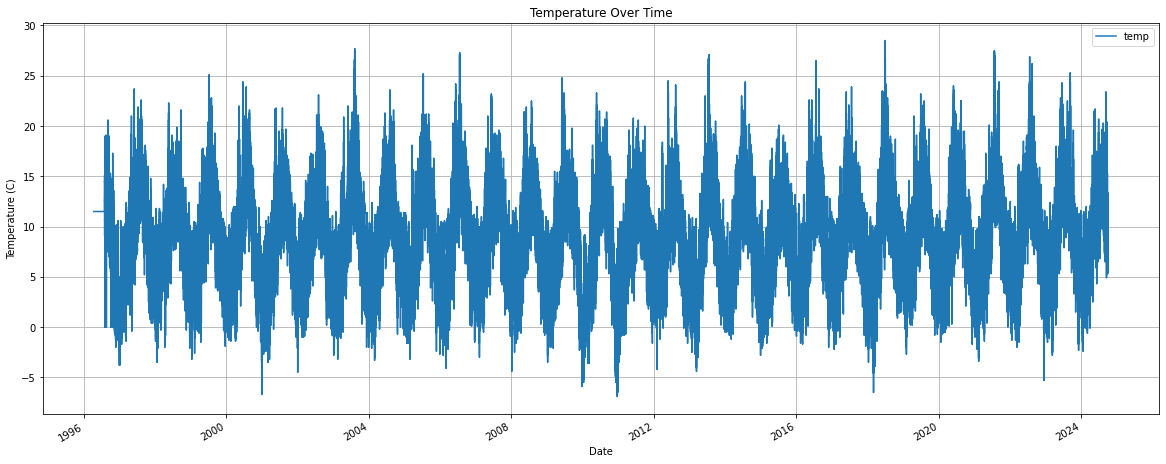

In [8]:
# plot temp vs time
df.plot(
    x='date',
    y='temp',
    kind='line',
    title="Temperature Over Time",
    xlabel="Date",
    ylabel="Temperature (C)",
    figsize=(20, 8),
    grid=True)

# Show the plot
plt.show()

Now to plot the mean temp each day. We can use pandas groupby() function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Group by day:

- https://stackoverflow.com/questions/39400115/python-pandas-group-by-date-using-datetime-data

date
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2024-09-27     8.291667
2024-09-28     8.479167
2024-09-29     9.183333
2024-09-30     9.891667
2024-10-01     8.200000
Name: temp, Length: 10291, dtype: float64


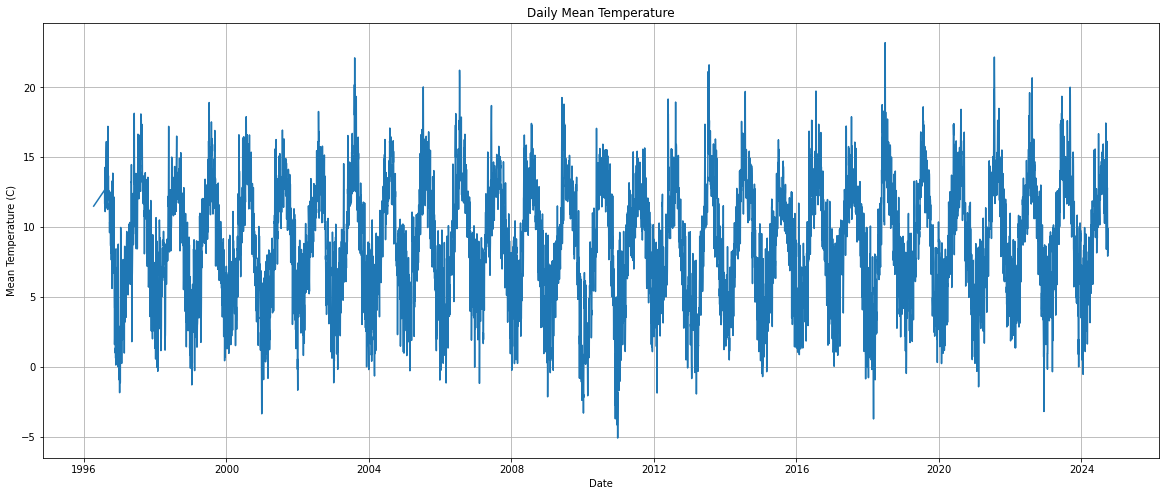

In [25]:
# Group by 'date' and calculate the mean temperature for each day
daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean()

#print(daily_mean_temp)

# Plot the daily mean temperature
daily_mean_temp.plot(
    kind='line',
    title="Daily Mean Temperature",
    xlabel="Date",
    ylabel="Mean Temperature (C)",
    figsize=(20, 8),
    grid=True
    )

# Show the plot
plt.show()

Now to plot yearly average temperature.

- https://www.statology.org/pandas-group-by-year/

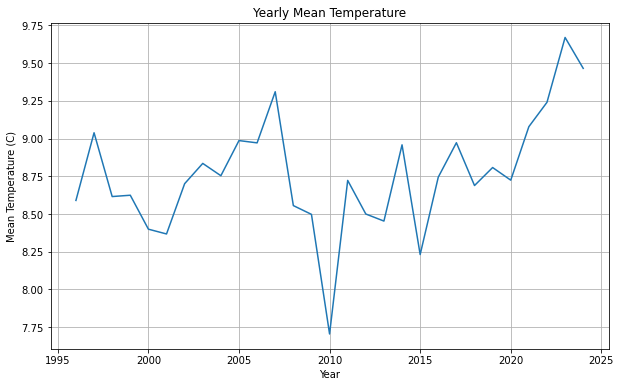

In [20]:
# Group by the year extracted from the 'date' column and get the mean temperature
yearly_mean_temp = df.groupby(df['date'].dt.year)['temp'].mean()

# Plot the yearly mean temperature
yearly_mean_temp.plot(kind='line', title="Yearly Mean Temperature", xlabel="Year", ylabel="Mean Temperature (C)", figsize=(10, 6), grid=True)

# Show the plot
plt.show()